## Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pll 
%matplotlib inline 
sns.set(color_codes=True)

## Loading Data & Descriptive Statistics

In [2]:
df = pd.read_csv("qp1_data.csv")

In [3]:
df.shape

(21613, 13)

In [170]:
df.isnull().sum()

price                  1159
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
grade                     0
condition                 0
yr_built                  0
yr_renovated              0
zip_code                  0
Renovated                 0
price(in Thousands)       0
price_1m                  0
popular_zip               0
popular_area              0
dtype: int64

In [4]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,condition,yr_built,yr_renovated,zip_code
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540182.16,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,7.66,3.41,1971.01,84.40,98077.94
std,367362.23,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,1.18,0.65,29.37,401.68,53.51
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,1900.00,0.00,98001.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,7.00,3.00,1951.00,0.00,98033.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,7.00,3.00,1975.00,0.00,98065.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,8.00,4.00,1997.00,0.00,98118.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,13.00,5.00,2015.00,2015.00,98199.00


In [169]:
max(df["yr_built"])

2015

In [5]:
df["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [6]:

df[['yr_renovated']] = df[['yr_renovated']].replace([0], ['Never Renovated'])

In [7]:
df1 = df[df.yr_renovated != 'Never Renovated']

## Base EDA

In [81]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'condition', 'yr_built', 'yr_renovated',
       'zip_code', 'Renovated', 'price(in Thousands)', 'price_1m',
       'popular_zip', 'popular_area'],
      dtype='object')

In [109]:
df['price'].isnull().sum()
df2 =df.dropna(subset = ['price'])


In [110]:
df2['price'].isnull().sum()

0

In [113]:
df2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,condition,yr_built,yr_renovated,zip_code,Renovated,price(in Thousands),price_1m,popular_zip,popular_area
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,3,1955,Never Renovated,98178,Never Renovated,221.9,Price <= 1M,262,Less Popular
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,3,1951,1991,98125,Renovated,538.0,Price <= 1M,410,Less Popular
2,180000.0,2,1.00,770,10000,1.0,0,0,6,3,1933,Never Renovated,98028,Never Renovated,180.0,Price <= 1M,283,Less Popular


In [121]:
df2["price/1000"] = round(df2["price"] / 1000)

C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
df2["price/1000"].astype(int)

0         222
1         538
2         180
3         604
4         510
6         258
7         292
8         230
9         323
10        662
11        468
12        310
13        400
14        530
15        650
16        395
17        485
18        189
19        230
20        385
22        285
23        253
24        329
25        233
26        937
27        667
28        438
29        719
30        580
31        280
32        688
33        535
34        322
35        696
36        550
37        640
38        240
39        605
40        625
41        775
42        862
43        685
44        309
45        488
46        210
47        785
48        450
50        228
51        345
52        600
53        585
54        920
55        885
56        292
57        301
58        951
59        430
60        650
61        289
62        505
63        549
64        425
65        318
66        975
67        287
68        204
70       1040
71        325
72        571
73        360
74        349
75    

In [132]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'condition', 'yr_built', 'yr_renovated',
       'zip_code', 'Renovated', 'price(in Thousands)', 'price_1m',
       'popular_zip', 'popular_area'],
      dtype='object')

<AxesSubplot:xlabel='price/1000'>

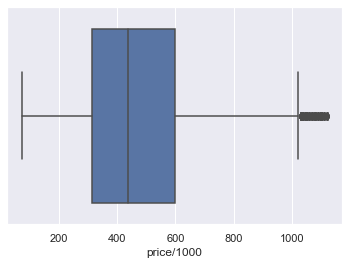

In [130]:
sns.boxplot(x = "price/1000", data = df2)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

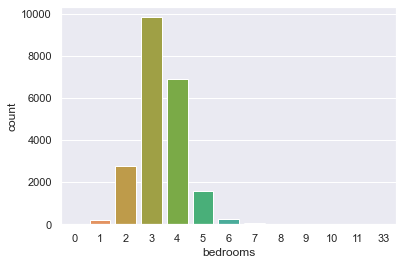

In [161]:
sns.countplot(x = "bedrooms", data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '0.75'),
  Text(3, 0, '1.0'),
  Text(4, 0, '1.25'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.75'),
  Text(7, 0, '2.0'),
  Text(8, 0, '2.25'),
  Text(9, 0, '2.5'),
  Text(10, 0, '2.75'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.25'),
  Text(13, 0, '3.5'),
  Text(14, 0, '3.75'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.25'),
  Text(17, 0, '4.5'),
  Text(18, 0, '4.75'),
  Text(19, 0, '5.0'),
  Text(20, 0, '5.25'),
  Text(21, 0, '5.5'),
  Text(22, 0, '5.75'),
  Text(23, 0, '6.0'),
  Text(24, 0, '6.25'),
  Text(25, 0, '6.5'),
  Text(26, 0, '6.75'),
  Text(27, 0, '7.5'),
  Text(28, 0, '7.75'),
  Text(29, 0, '8.0')])

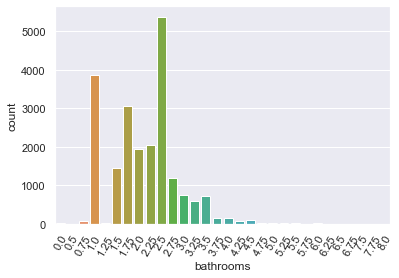

In [162]:
ax = sns.countplot(x = "bathrooms", data = df)
plt.xticks(rotation=60)

<AxesSubplot:xlabel='sqft_living'>

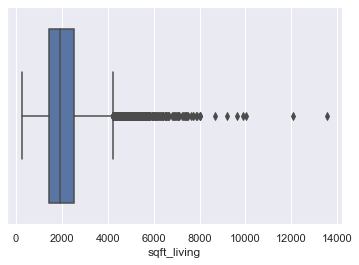

In [163]:
sns.boxplot(x = "sqft_living", data = df)

<AxesSubplot:xlabel='sqft_lot'>

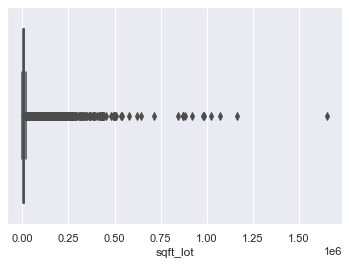

In [164]:
sns.boxplot(x = "sqft_lot", data = df)

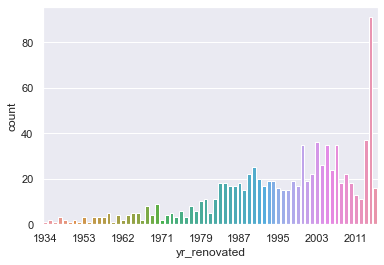

In [9]:
fig, ax = plt.subplots()
sns.countplot(x = df1['yr_renovated'], data = df1, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

<AxesSubplot:xlabel='yr_built'>

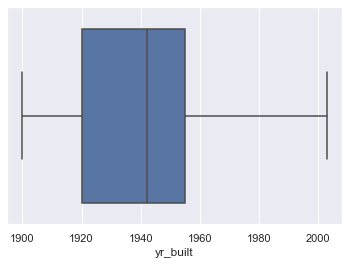

In [150]:
sns.boxplot(x = df1['yr_built'], data = df1)

<AxesSubplot:xlabel='yr_renovated'>

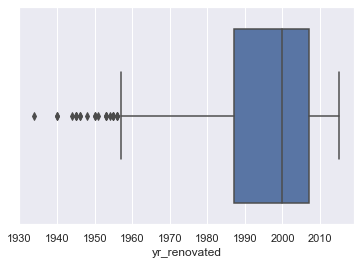

In [151]:
sns.boxplot(x = df1['yr_renovated'], data = df1)

In [11]:
df['Renovated'] = np.where(df['yr_renovated'] =='Never Renovated', 'Never Renovated', 'Renovated')

<AxesSubplot:xlabel='Renovated', ylabel='count'>

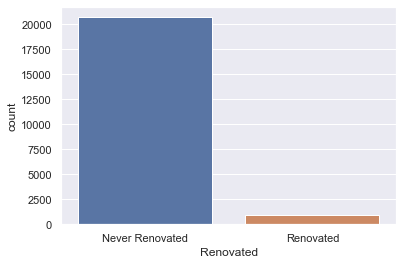

In [12]:

sns.countplot(x = df["Renovated"], data =df)


<AxesSubplot:xlabel='waterfront', ylabel='count'>

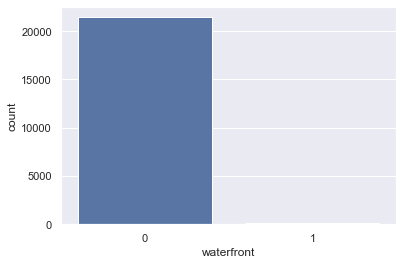

In [13]:
sns.countplot(x = df["waterfront"], data =df)

<AxesSubplot:xlabel='zip_code', ylabel='count'>

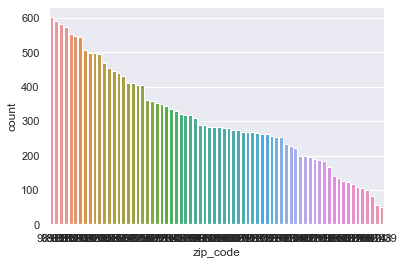

In [14]:
sns.countplot(x = df["zip_code"],
              data = df,
              order = df['zip_code'].value_counts().index)


In [15]:
df["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [160]:
df.shape

(21613, 18)

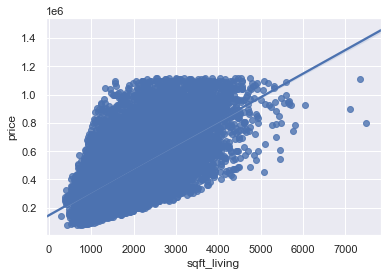

In [158]:
# import seaborn as sns; sns.set_theme(color_codes=True)

ax = sns.regplot(x="sqft_living", y="price",  data=df)

Text(32.13363333333335, 0.5, 'Price')

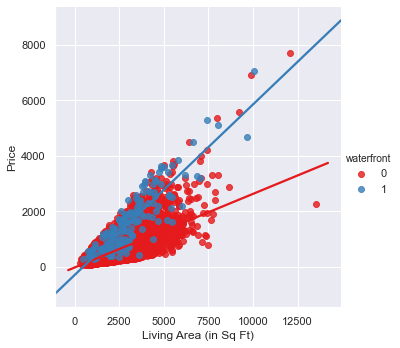

In [17]:
df["price(in Thousands)"] = df["price"]/1000
df['price_1m'] = np.where(df['price'] > 1000000, 'Price > 1M', 'Price <= 1M')


# add regression line per group Seaborn
sns.lmplot(x="sqft_living", 
           y="price(in Thousands)", 
           hue="waterfront",
           ci=None,
           data=df,  palette="Set1"
           )
plt.xlabel("Living Area (in Sq Ft)")
plt.ylabel("Price")
# plt.savefig("How_To_Add_Regression_Line_per_group_without_CI_Seaborn.png",
#                     format='png',dpi=150)

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                  323050.00
bedrooms                    1.00
bathrooms                   0.75
sqft_living              1123.00
sqft_lot                 5648.00
floors                      1.00
waterfront                  0.00
view                        0.00
grade                       1.00
condition                   1.00
yr_built                   46.00
zip_code                   85.00
price(in Thousands)       323.05
dtype: float64


In [19]:
df.shape

(21613, 16)

In [20]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out1 = df_in.loc[(df_in[col_name] > fence_low) | (df_in[col_name] < fence_high)]
    return df_out1

In [21]:
def remove_outlier(df_in, col_name, thres=1.5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-thres*iqr
    fence_high = q3+thres*iqr
    mask = (df_in[col_name] > fence_high) | (df_in[col_name] < fence_low)
    df_in.loc[mask, col_name] = np.nan
    return df_in

In [22]:
remove_outlier(df, 'price')
df.shape

(21613, 16)

In [23]:
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out1 = df.loc[(df["sqft_living"] > fence_low) | (df["sqft_living"] < fence_high)]

In [24]:
df_out1.shape

(21613, 16)

In [25]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    lower_bound  = q1 - (1.5  * iqr)
    upper_bound = q3 + (1.5 * iqr)

    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

In [26]:
df.shape

(21613, 16)

In [27]:
df_out = remove_outlier(df, 'sqft_living')
df_out = remove_outlier(df_out, 'price')
df_out = remove_outlier(df_out, 'sqft_lot')
df_out.shape

(17930, 16)

Text(32.13363333333335, 0.5, 'Price')

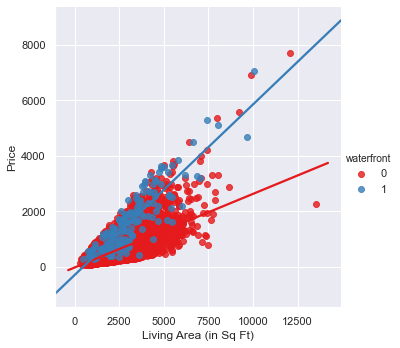

In [28]:


sns.lmplot(x="sqft_living", 
           y="price(in Thousands)", 
           hue="waterfront",
           ci=None,
           data=df,  palette="Set1"
           )
plt.xlabel("Living Area (in Sq Ft)")
plt.ylabel("Price")
# plt.xscale('log')
# plt.yscale('log')

In [29]:
df['price_1m'] = np.where(df['price'] > 1000000, 'Price > 1M', 'Price <= 1M')

<AxesSubplot:xlabel='price(in Thousands)'>

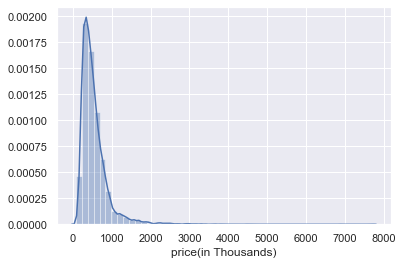

In [30]:
sns.distplot(df["price(in Thousands)"])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

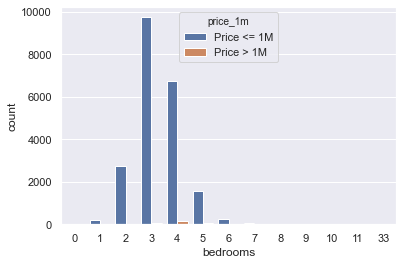

In [31]:
sns.countplot(x=df["bedrooms"], hue=df["price_1m"], data=df)

In [32]:
from matplotlib import pyplot as plt
def get_graph(data, xname1, title):

    sns.set(style="darkgrid")
    total = float(len(data)) 
    ax = sns.countplot(x = xname1, data = data)
    ax.set_title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 
    show()

In [33]:
from functools import partial

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def to_percent(y, position, n):
    s = str(round(100 * y / n, 3))

    if plt.rcParams['text.usetex']:
        return s + r'$\%$'

    return s + '%'

def plotting_hist(data, data2):    
    f, ax = plt.subplots(figsize=(10, 5))
    ax.hist(data, hue = data2,
            bins=len(set(data)), 
            rwidth=1)

    percent_formatter = partial(to_percent,
                                n=len(data))
    formatter = FuncFormatter(percent_formatter)
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.show()




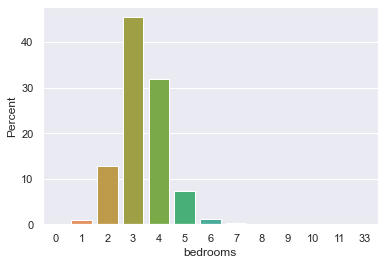

In [34]:


x = df["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.show()

In [35]:
df_over_1m = df.loc[df["price_1m"] == 'Price > 1M'] #'Price > 1M', 'Price <= 1M'
df_less_1m = df.loc[df["price_1m"] == 'Price <= 1M']

In [36]:
def get_graph(data, xname1, title):
    x = data[xname1]
    sns.set(style="darkgrid")
    total = float(len(data)) 
    percentage = lambda i: len(i) / float(len(x)) * 100
    ax = sns.barplot(x = xname1,y=x,estimator=percentage, data = data)
    ax.set_title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 1,
                '{:1.2f}'.format(height/total),
                ha="center") 
    plt.show()

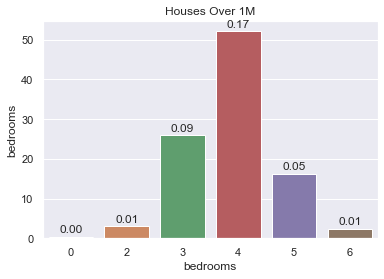

In [37]:
get_graph(df_over_1m, "bedrooms", "Houses Over 1M")

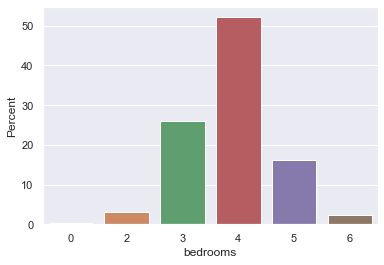

In [38]:
x = df_over_1m["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")
plt.show()
# hue = df["price_1m"],

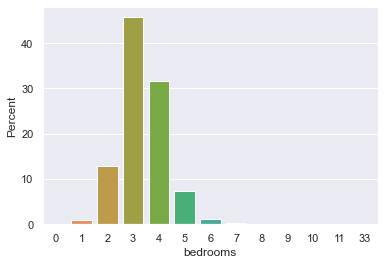

In [39]:
x = df_less_1m["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")
plt.show()

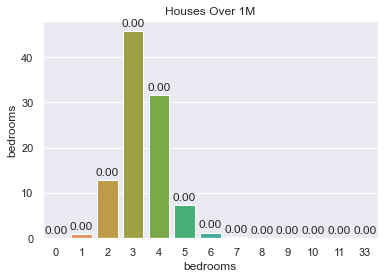

In [40]:
get_graph(df_less_1m, "bedrooms", "Houses Over 1M")

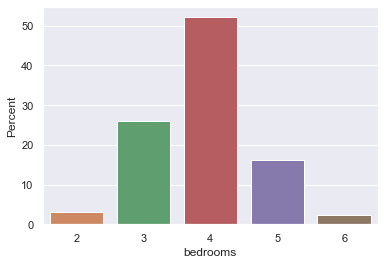

In [41]:
df_over_1mb = df_over_1m.loc[(df_over_1m['bedrooms'] >= 2)]

x = df_over_1m["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.xlim(0.5,)
plt.show()

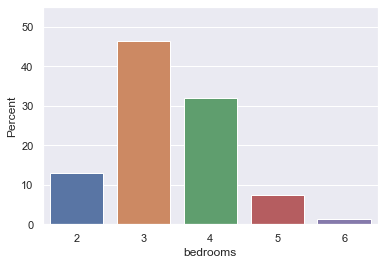

In [42]:
df_less_1mb = df_less_1m.loc[(df_less_1m['bedrooms'] >= 2) & (df_less_1m['bedrooms'] <= 6)]

x = df_less_1mb["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.ylim(0,55)

plt.show()

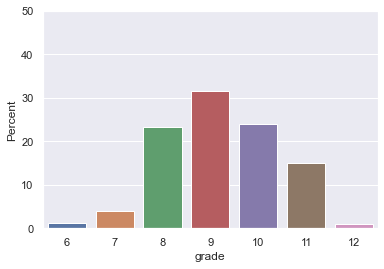

In [43]:
df_over_1mg = df_over_1m.loc[(df_over_1m['grade'] >= 4) & (df_over_1m['grade'] <= 12)]

x = df_over_1mg["grade"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.ylim(0,50)

plt.show()

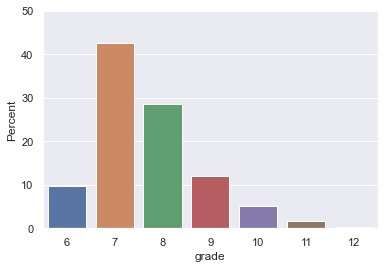

In [44]:
df_less_1mg = df_less_1m.loc[(df_less_1m['grade'] >= 6) & (df_less_1m['grade'] <= 12)]


x = df_less_1mg["grade"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.ylim(0,50)
plt.show()

<AxesSubplot:xlabel='zip_code', ylabel='count'>

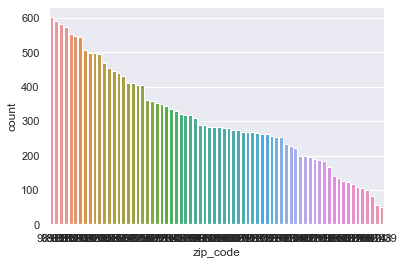

In [45]:
sns.countplot(x = df["zip_code"],
              data = df,
              order = df['zip_code'].value_counts().index)

In [46]:
 df["zip_code"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zip_code, Length: 70, dtype: int64

In [47]:
df.groupby(["zip_code"]).count()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,condition,yr_built,yr_renovated,Renovated,price(in Thousands),price_1m
zip_code,,,,,,,,,,,,,,,
98001,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362
98002,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
98003,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280
98004,154,317,317,317,317,317,317,317,317,317,317,317,317,317,317
98005,152,168,168,168,168,168,168,168,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,231,255,255,255,255,255,255,255,255,255,255,255,255,255,255
98178,261,262,262,262,262,262,262,262,262,262,262,262,262,262,262
98188,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136


In [48]:
df['popular_zip'] = df['zip_code'].groupby(df['zip_code']).transform('count')

In [49]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df['zip_code'].value_counts())

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    310
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98031    274
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zip_code, dtype: int64


In [50]:
df['popular_area'] = np.where(df['popular_zip'] > 540, 'Popular', 'Less Popular')

In [51]:
print(df['popular_area'].value_counts())

Less Popular    17618
Popular          3995
Name: popular_area, dtype: int64


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

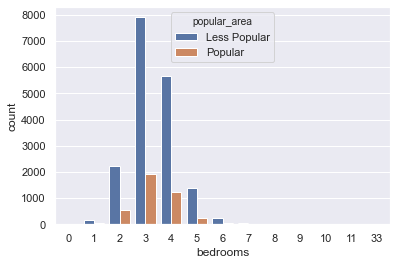

In [52]:
sns.countplot(x = df['bedrooms'], hue =df['popular_area'], data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

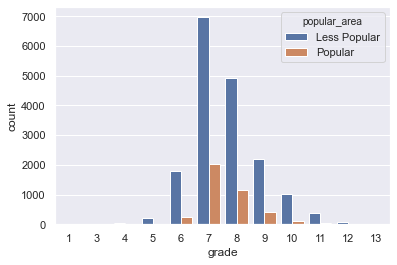

In [53]:
sns.countplot(x = df['grade'], hue =df['popular_area'], data=df)

In [54]:
df_over_5k = df.loc[df["popular_area"] == 'Popular'] #'Price > 1M', 'Price <= 1M'
df_less_5k = df.loc[df["popular_area"] == 'Less Popular']

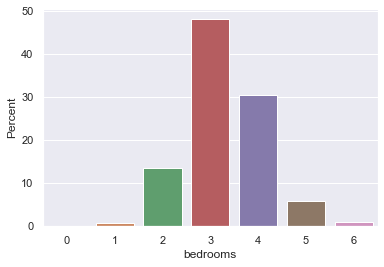

In [55]:
df_over_5k1 = df_over_5k.loc[(df_over_5k['bedrooms'] >= 0) & (df_over_5k['bedrooms'] <= 6)]

x = df_over_5k1["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.show()

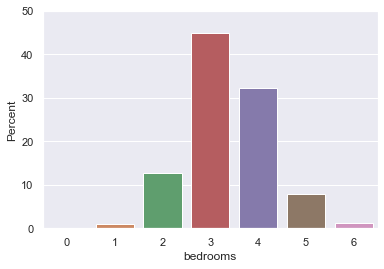

In [56]:
df_less_5k1 = df_less_5k.loc[(df_less_5k['bedrooms'] >= 0) & (df_less_5k['bedrooms'] <= 6)]
x = df_less_5k1["bedrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.ylim(0, 50)

plt.show()

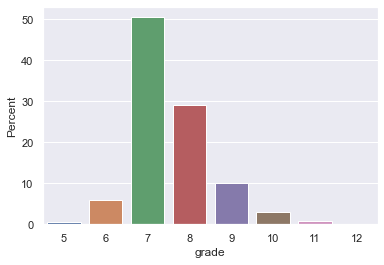

In [57]:
df_over_5k1= df_over_5k.loc[(df_over_5k['grade'] >= 5) & (df_over_5k['grade'] <= 12)]

x = df_over_5k1["grade"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
# plt.xlim(0, )
plt.show()

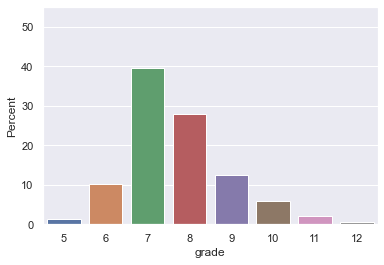

In [58]:
# df_over_5k1= df_over_5k.loc[(df_over_5k['grade'] >= 5) & (df_over_5k['grade'] <= 12)]
df_less_5k2 = df_less_5k.loc[(df_less_5k['grade'] >= 5) & (df_less_5k['grade'] <= 12)]
x = df_less_5k2["grade"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.ylim(0, 55)
plt.show()

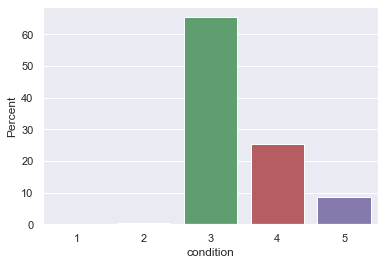

In [59]:
x = df_over_5k["condition"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.show()

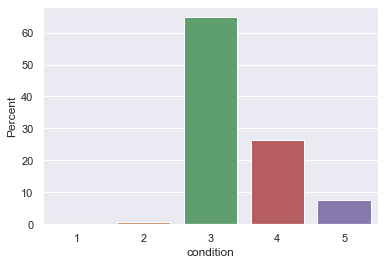

In [60]:
x = df_less_5k["condition"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.show()

In [61]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,condition,yr_built,yr_renovated,zip_code,Renovated,price(in Thousands),price_1m,popular_zip,popular_area
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,3,1955,Never Renovated,98178,Never Renovated,221.9,Price <= 1M,262,Less Popular
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,3,1951,1991,98125,Renovated,538.0,Price <= 1M,410,Less Popular
2,180000.0,2,1.00,770,10000,1.0,0,0,6,3,1933,Never Renovated,98028,Never Renovated,180.0,Price <= 1M,283,Less Popular


<AxesSubplot:xlabel='sqft_living'>

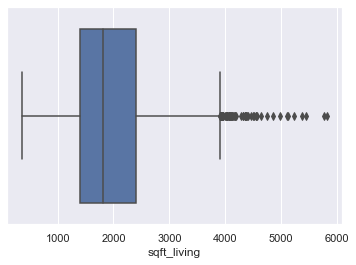

In [62]:
sns.boxplot(x = df_over_5k["sqft_living"], data = df_over_5k)


<AxesSubplot:xlabel='sqft_living'>

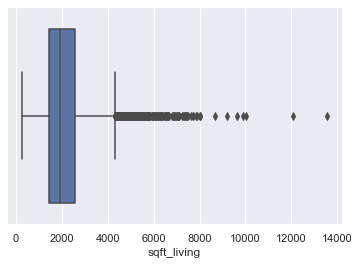

In [63]:
sns.boxplot(x = df_less_5k["sqft_living"], data = df_less_5k)


(0.0, 3500.0)

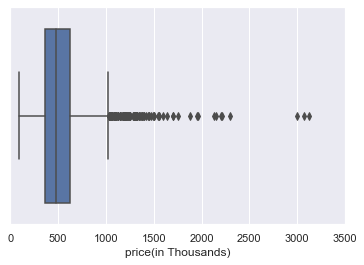

In [64]:
sns.boxplot(x = df_over_5k["price(in Thousands)"], data = df_over_5k)
plt.xlim(0, 3500)

(0.0, 3500.0)

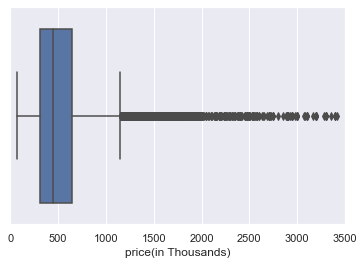

In [65]:
sns.boxplot(x = df_less_5k["price(in Thousands)"], data = df_less_5k)
plt.xlim(0, 3500)

(0.0, 100000.0)

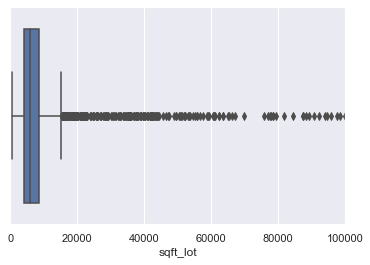

In [66]:
sns.boxplot(x = df_over_5k["sqft_lot"], data = df_over_5k)
plt.xlim(0, 100000)

(0.0, 100000.0)

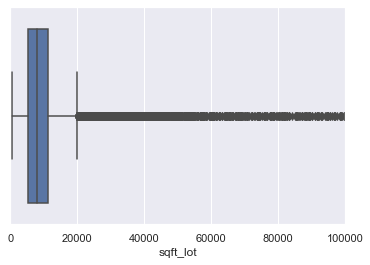

In [67]:
sns.boxplot(x = df_less_5k["sqft_lot"], data = df_less_5k)
plt.xlim(0, 100000)

<AxesSubplot:xlabel='yr_built'>

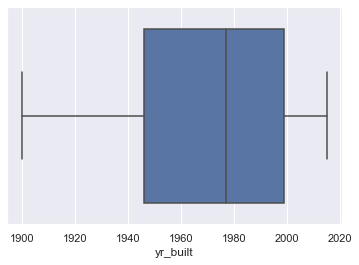

In [68]:
sns.boxplot(x = df_over_5k["yr_built"], data = df_over_5k)

<AxesSubplot:xlabel='yr_built'>

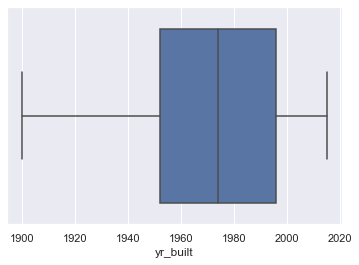

In [69]:
sns.boxplot(x = df_less_5k["yr_built"], data = df_less_5k)

<AxesSubplot:xlabel='popular_area', ylabel='count'>

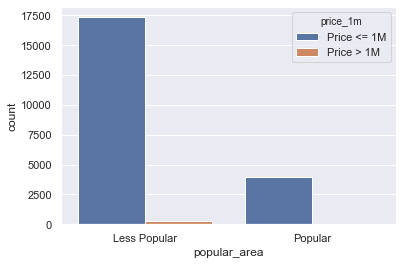

In [70]:
sns.countplot(x="popular_area", hue="price_1m", data=df)

In [71]:
df_over_5k["zip_code"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
Name: zip_code, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.5'),
  Text(3, 0, '1.75'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.25'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.75'),
  Text(8, 0, '3.0'),
  Text(9, 0, '3.25'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.75'),
  Text(12, 0, '4.0'),
  Text(13, 0, '4.25'),
  Text(14, 0, '4.5'),
  Text(15, 0, '4.75'),
  Text(16, 0, '5.0'),
  Text(17, 0, '5.25')])

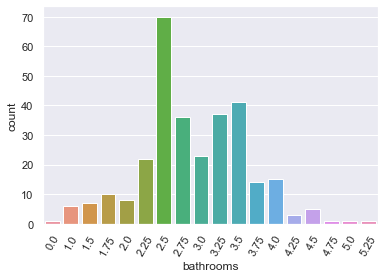

In [72]:
sns.countplot(x = df_over_1m["bathrooms"], data =df_over_1m)
plt.xticks(rotation=60)

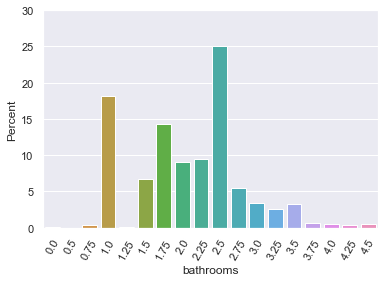

In [73]:
# sns.countplot(x = df_less_1m["bathrooms"], data =df_over_1m)
# plt.xticks(rotation=60)
df_less_1ms = df_less_1m.loc[(df_less_1m['bathrooms'] <= 4.5)]

x = df_less_1ms["bathrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.xticks(rotation=60)
plt.ylim(0,30)
plt.show()

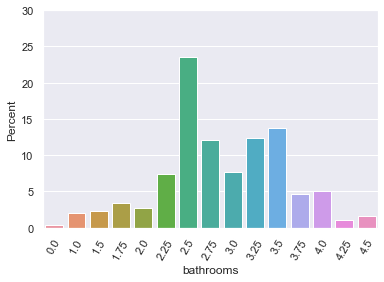

In [74]:
df_over_1ms = df_over_1m.loc[(df_over_1m['bathrooms'] <= 4.5)]

x = df_over_1ms["bathrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.xticks(rotation=60)
plt.ylim(0,30)
plt.show()

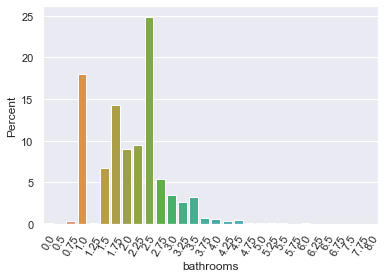

In [75]:
x = df_less_1m["bathrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.xticks(rotation=60)
plt.show()

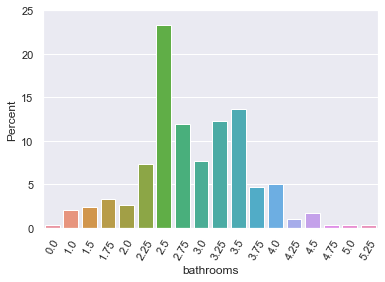

In [76]:
x = df_over_1m["bathrooms"]
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x, estimator=percentage)
ax.set(ylabel="Percent")
plt.xticks(rotation=60)
plt.ylim(0,25)
plt.show()